In [1]:
# Load the packages you intend to work with every time you start a new session
library(tseries)
library(TSA)
library(forecast)

Loading required package: leaps
Loading required package: locfit
locfit 1.5-9.1 	 2013-03-22
Loading required package: mgcv
Loading required package: nlme
This is mgcv 1.8-12. For overview type 'help("mgcv-package")'.

Attaching package: ‘TSA’

The following objects are masked from ‘package:stats’:

    acf, arima

The following object is masked from ‘package:utils’:

    tar

Loading required package: zoo

Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric

Loading required package: timeDate

Attaching package: ‘timeDate’

The following objects are masked from ‘package:TSA’:

    kurtosis, skewness

This is forecast 7.1 


Attaching package: ‘forecast’

The following objects are masked from ‘package:TSA’:

    fitted.Arima, plot.Arima

The following object is masked from ‘package:nlme’:

    getResponse



In [7]:
NAO <- read.table("http://www.escet.urjc.es/biodiversos/R/NAO.txt", header=T, sep="\t")

In [4]:
NAO.ts <- ts(NAO$NAO, start = min(NAO$year))

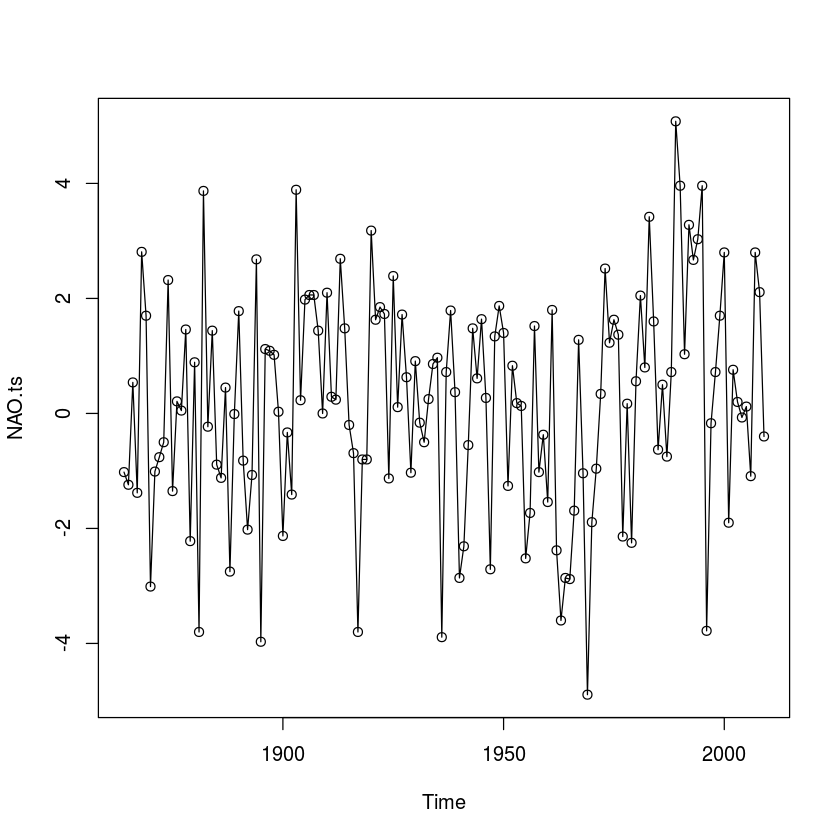

In [6]:
# looks stationary; no seasonality/trend in the data
plot(NAO.ts, type='o')

# HoltWinters (part of `stats` package)

## parameters for single / double / triple exponential smoothing

- *alpha* - white noise
- *beta* - trend
- *gamma* - seasonal

values: 0 to 1
- 0: use all past observations
- close to 1: only use the most recent observations

In [8]:
# since there's no trend / seasonality in the data,
# we use single expo. smoothing

In [9]:
alisim1 <- HoltWinters(NAO.ts, gamma=F, beta=F)

In [12]:
class(alisim1)

[1] "HoltWinters"

In [11]:
# alpha was chosen as 0.1020395, i.e. it uses most of the past observations
alisim1

Holt-Winters exponential smoothing without trend and without seasonal component.

Call:
HoltWinters(x = NAO.ts, beta = F, gamma = F)

Smoothing parameters:
 alpha: 0.1020395
 beta : FALSE
 gamma: FALSE

Coefficients:
       [,1]
a 0.7714705

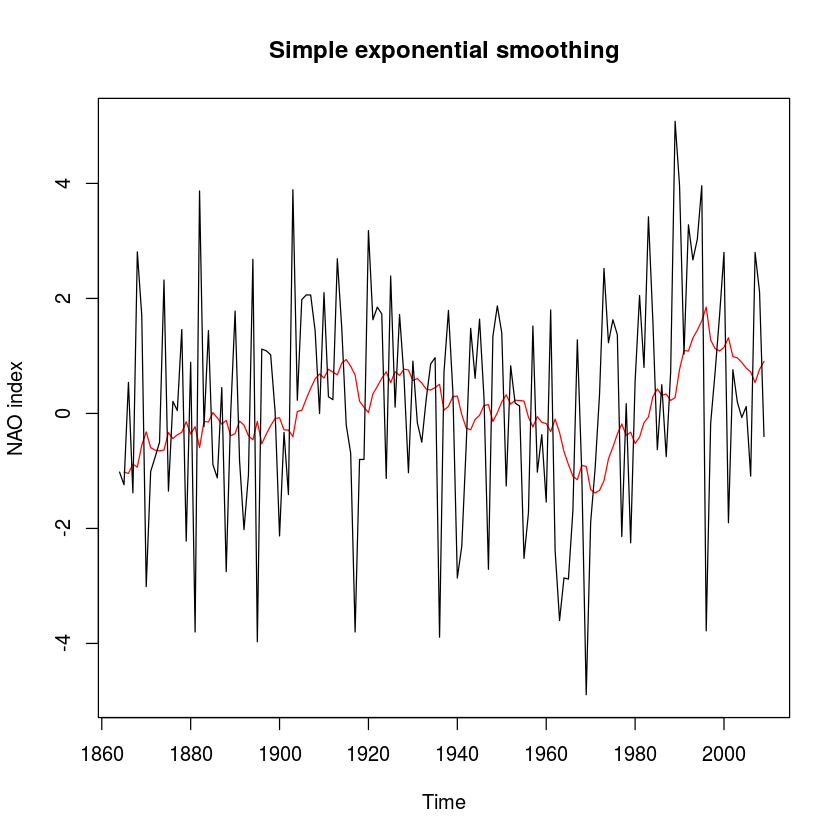

In [14]:
plot(alisim1, ylab="NAO index", main="Simple exponential smoothing")

# double exponential smoothing

In [16]:
# available from library 'ts'
str(uspop)

 Time-Series [1:19] from 1790 to 1970: 3.93 5.31 7.24 9.64 12.9 17.1 23.2 31.4 39.8 50.2 ...


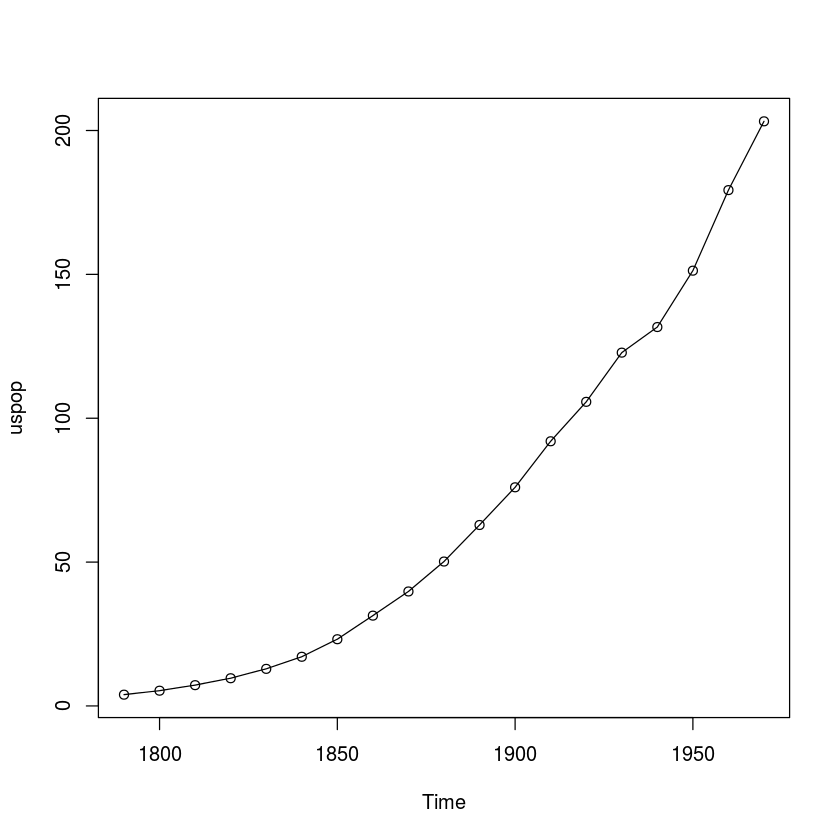

In [18]:
plot(uspop, type='o')

In [19]:
# white noise: only look at last obs
# trend / slope: look at some recent obs (0.77)
aliholt <- HoltWinters(uspop, gamma = F)

In [21]:
# our prediction for the next year is 203.20000 (last obs) + 24.29044 (slope)
aliholt

Holt-Winters exponential smoothing with trend and without seasonal component.

Call:
HoltWinters(x = uspop, gamma = F)

Smoothing parameters:
 alpha: 1
 beta : 0.7709064
 gamma: FALSE

Coefficients:
       [,1]
a 203.20000
b  24.29044

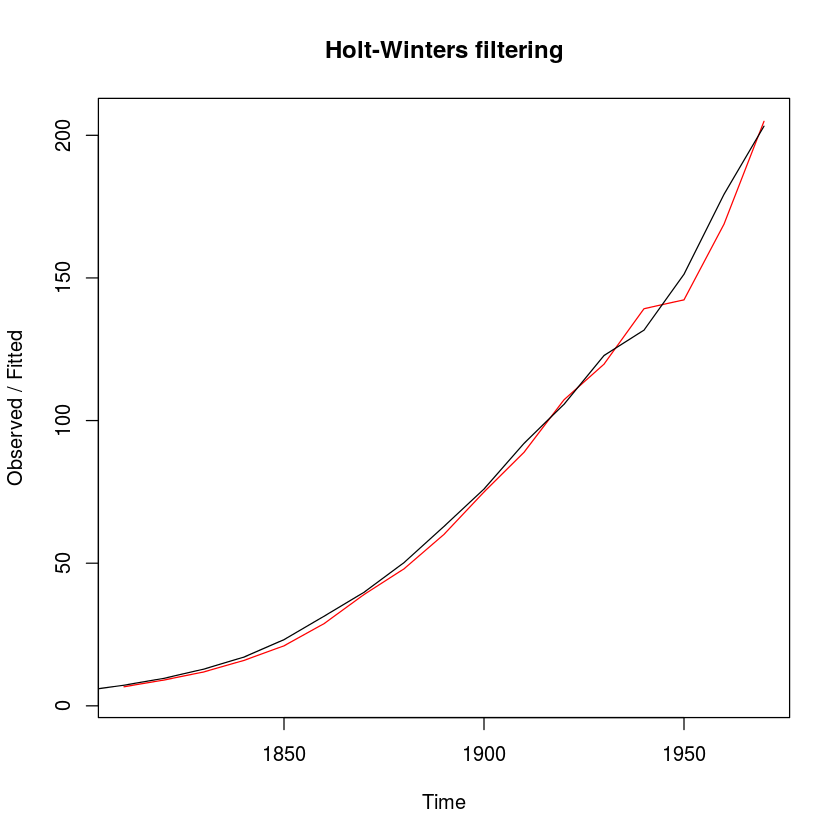

In [20]:
plot(aliholt)

In [27]:
# n.ahead=5: look five time units ahead (our time unit here is 10 yrs)
pred.aliholt <- predict(aliholt, n.ahead = 5, prediction.interval = T)

## This model isn't good for forecasting!

This is not a probabilistic model, so the blue lines aren't confidence intervals!


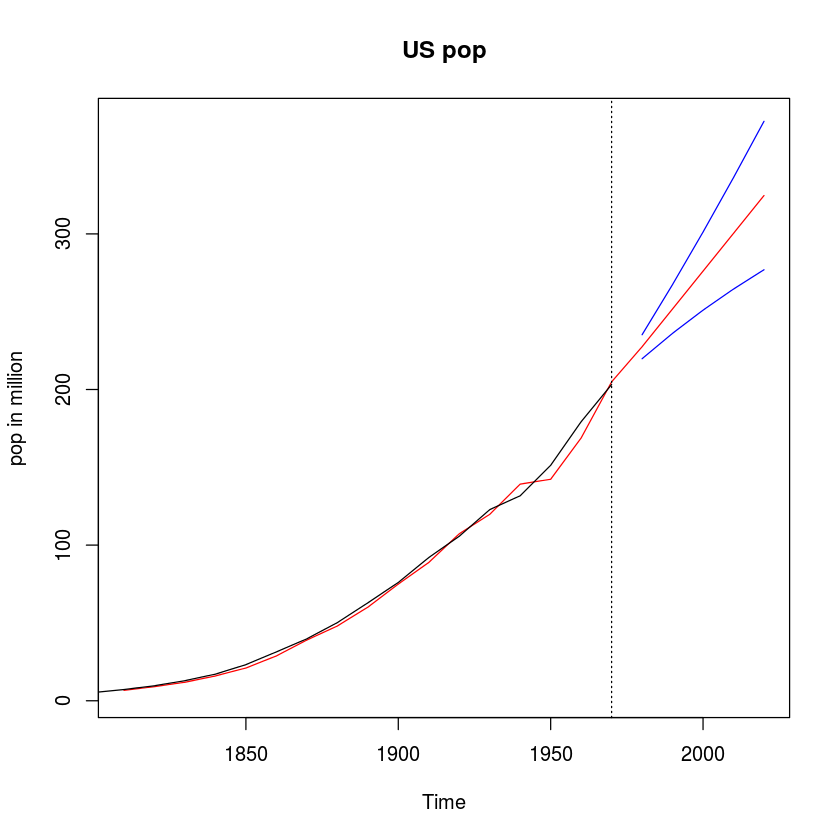

In [25]:
plot(aliholt, pred.aliholt, ylab="pop in million", main="US pop")

## triple exponential smoothing

In [28]:
data(co2, package = "TSA")

In [29]:
str(co2)

 Time-Series [1:132] from 1994 to 2005: 363 364 365 364 364 ...


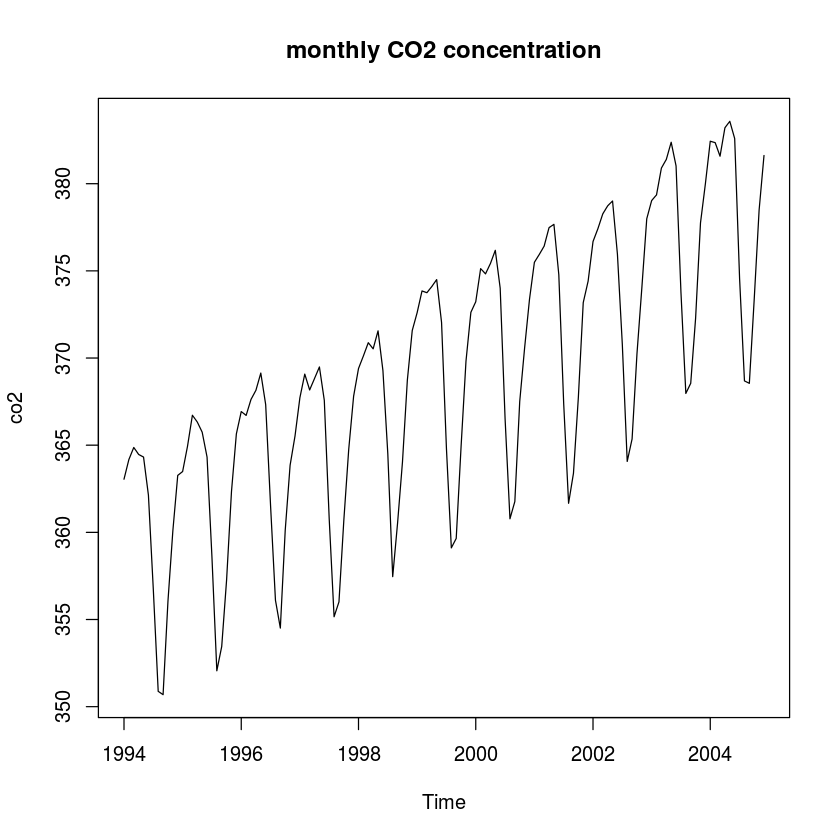

In [30]:
plot(co2, main = "monthly CO2 concentration")

In [31]:
aliHW <- HoltWinters(co2)

In [34]:
# we're using all the data for the trend and
# most of the data for seasonality and "noise"

# coefficients s1 .. s12 map to months in the first
# year in the future
aliHW

Holt-Winters exponential smoothing with trend and additive seasonal component.

Call:
HoltWinters(x = co2)

Smoothing parameters:
 alpha: 0.3610268
 beta : 0
 gamma: 0.3532495

Coefficients:
            [,1]
a   378.85957267
b     0.14625000
s1    3.87967405
s2    4.20043381
s3    4.49202098
s4    5.16172899
s5    5.39725075
s6    3.22497018
s7   -3.94239470
s8   -9.96979940
s9   -9.31512179
s10  -4.68811780
s11  -0.05222415
s12   2.53410175

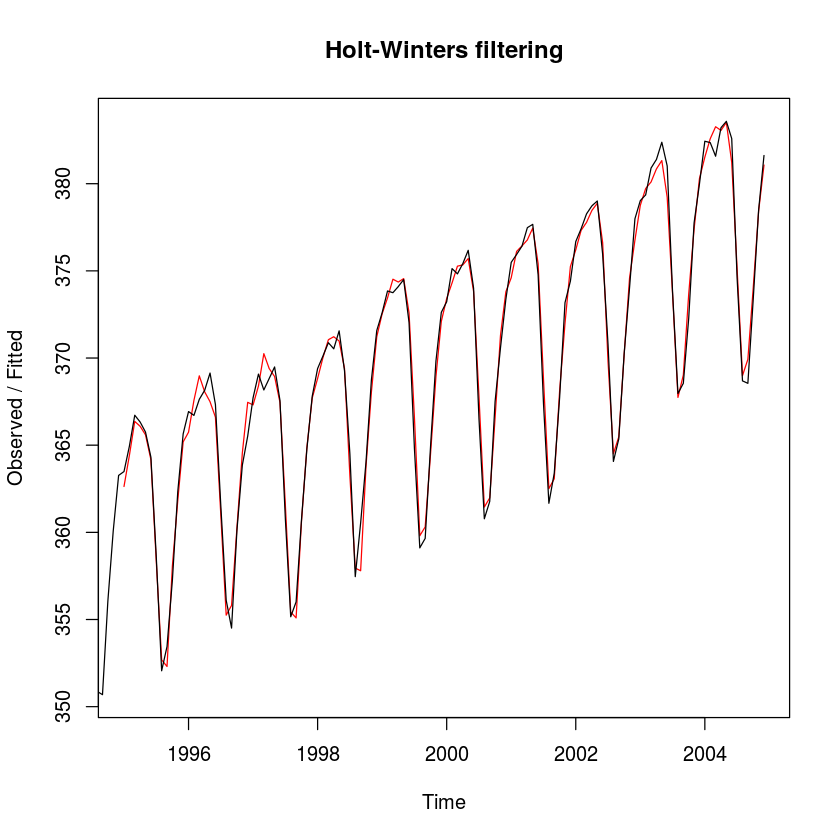

In [32]:
plot(aliHW)

# Never trust these predictions!

In [35]:
# here: time unit = month
# n.ahead=120 -> look 10 yrs ahead
pred.aliHW <- predict(aliHW, n.ahead = 120, prediction.interval = T)

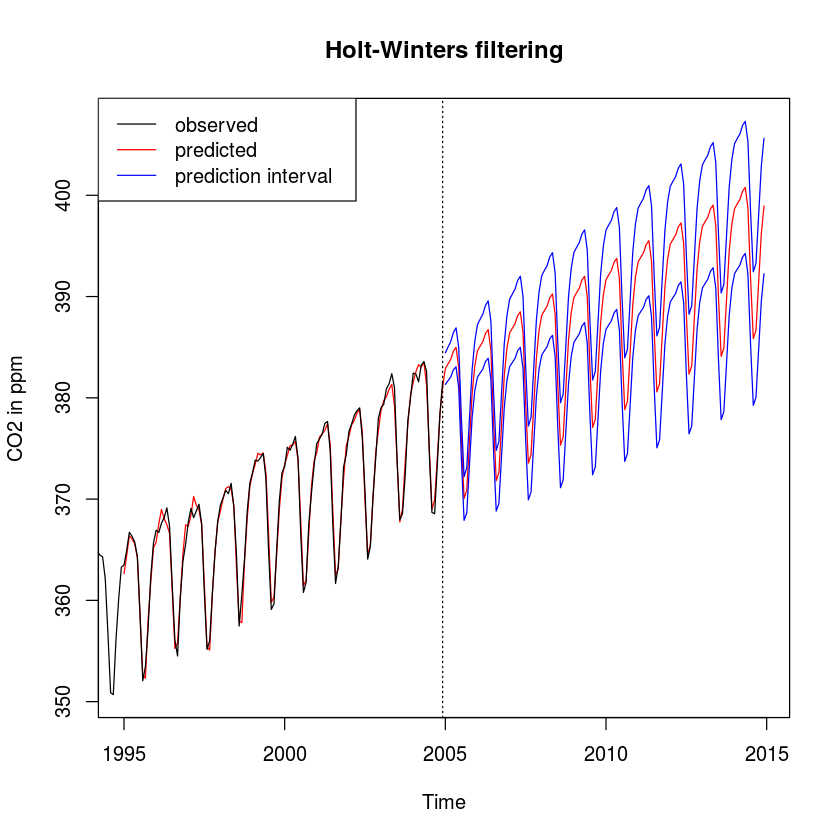

In [37]:
plot(aliHW, pred.aliHW, ylab="CO2 in ppm")
labs = c("observed", "predicted", "prediction interval")
legend("topleft", lty=rep(1,3), legend=labs, col=c("black", "red", "blue"))